In [1]:
import numpy as np
np.random.seed(271828)
from os import system, environ
from pickle import dump, load, HIGHEST_PROTOCOL
import pandas as pd
from pprint import pprint
from glob import glob
import datetime as dt
from iminuit import Minuit
from iminuit.cost import LeastSquares
import warnings
from scipy import stats, fft

%matplotlib widget
# %matplotlib inline
# %matplotlib inline
from ipywidgets import *

from plottools import *
import matplotlib.pyplot as plt
import matplotlib
from mplhep import histplot, style
style.use(style.LHCb2)
import matplotlib.dates as mdates
import matplotlib.patheffects as pe
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.ticker import *
matplotlib.colormaps.register(name="beer", cmap=LinearSegmentedColormap.from_list("beer", colors=[niceColour('beeryellow'), niceColour('beerbrown')]))
import seaborn as sns

# import plotly.graph_objects as go
# from plotly.offline import iplot
# import plotly.io as pio
# pio.renderers.default='notebook'

import matplotlib.dates as mdates
import matplotlib.patheffects as pe
from matplotlib.ticker import *
warnings.filterwarnings("ignore", message='UserWarning: This figure includes Axes that are not compatible with tight_layout*')

# patch to adjust code for margins in 3D projections
###patch start###
from mpl_toolkits.mplot3d.axis3d import Axis
if not hasattr(Axis, "_get_coord_info_old"):
    def _get_coord_info_new(self, renderer):
        mins, maxs, centers, deltas, tc, highs = self._get_coord_info_old(renderer)
        mins += deltas / 4
        maxs -= deltas / 4
        return mins, maxs, centers, deltas, tc, highs
    Axis._get_coord_info_old = Axis._get_coord_info  
    Axis._get_coord_info = _get_coord_info_new
###patch end###

In [2]:
# df = pd.read_csv("1202beers.csv", delimiter=';', encoding='utf-8')
# df = pd.read_csv("1230beers.csv", delimiter=',', encoding='utf-8')
# df = pd.read_csv("1407beers.csv", delimiter=';', encoding='utf-8')
# df = pd.read_csv("1476beers.csv", delimiter=';', encoding='utf-8')
# df = pd.read_csv("1524beers.csv", delimiter=';', encoding='utf-8')
# df = pd.read_csv("1599beers.csv", delimiter=';', encoding='utf-8')
df = pd.read_csv("1660beers.csv", delimiter=';', encoding='utf-8')

In [66]:
set(df.Type)

{'3 hops',
 'APA',
 'American IPA',
 'American Zwickel',
 'American amber ale',
 'American pale ale',
 'BBRBCHLIPA',
 'BIPA',
 'Baltic porter',
 'Belgian',
 'Belgian IPA',
 'Belgian ale',
 'Bock',
 'British  Belgian',
 'CIPA',
 'CIPAwB',
 'Christmas',
 'Christmas Beer',
 'Christmas ale',
 'Christmas beer',
 'Cumberland ale',
 'DBIPA',
 'DDHDIPA',
 'DDHIPA',
 'DDHRDIPA',
 'DDHTNEIPA',
 'DDHW pislner',
 'DIPA',
 'DNEIPA',
 'Doppelbock',
 'Dunkel',
 'EPA',
 'EPIA',
 'Festbier',
 'GIIPA',
 'GIPA',
 'GTJHIPA',
 'German IPA',
 'German lager',
 'German pale ale',
 'HDIPA',
 'HIPA',
 'HNEIPA',
 'IIPA',
 'IPA',
 'IPL',
 'Imperial IPA',
 'Imperial dark sour',
 'Imperial milk stout',
 'Imperial stout',
 'Irish red ale',
 'Irish stout',
 'Jahrhundert',
 'Keller pilsner',
 'Kellerbier',
 'Kentish ale',
 'Kentish strong',
 'Kriek',
 'Kölsch',
 'MIPA',
 'Maibock',
 'Meister',
 'Märzen',
 'NE IPA',
 'NEDIPA',
 'NEIPA',
 'NEPA',
 'NWIPA',
 'NZDIPA',
 'OPWCIPA',
 'Oktoberfest beer',
 'RIPA',
 'Russian i

In [73]:
# reject a few outlier styles

df.query("Type != 'soda'", inplace=True)
df.query("Type != 'rum'", inplace=True)
df.query("Type != 'cocktail'", inplace=True)
df.query("Type != 'champagne'", inplace=True)
df.query("Type != 'white wine'", inplace=True)
df.query("Type != 'sparkling rosé'", inplace=True)
df.query("Type != 'sparkling white wine'", inplace=True)
df.query("Type != 'red wine'", inplace=True)
df.query("Type != 'ginger ale'", inplace=True)
df.query("Type != 'ginger beer'", inplace=True)
df.query("Type != 'highball'", inplace=True)
df.query("Type != 'sake'", inplace=True)
df.query("Type != 'sports drink'", inplace=True)
df

Number     Storage                      Name  Est. Country  \
0        NaN        Blue               Timișoreana  1718      RO   
1        NaN        Blue               Timișoreana  1718      RO   
2        NaN        Blue               Timișoreana  1718      RO   
3      620.0        Blue               Timișoreana  1718      RO   
4      626.0        Blue               Timișoreana  1718      RO   
...      ...         ...                       ...   ...     ...   
1655  1444.0  Tall black        Hop Pug Triple Sec   NaN      BE   
1656   401.0  Tall black             Gruut Inferno   NaN      BE   
1657  1392.0  Tall black               Gruut Amber   NaN      BE   
1658  1584.0  Tall black                 Piedboeuf   NaN      BE   
1659  1590.0  Tall black  Saison Dupont Biologique   NaN      BE   

               Type   ABV    Vol       Date  
0            blonde   5.0  500.0        NaT  
1            blonde   5.0  500.0        NaT  
2        unfiltered   5.0  500.0        NaT  
3            blonde   5.0  500.0 2021-03-14  
4     unpasteurised   5.0  500.0 2021-03-26  
...             ...   ...    ...        ...  
1655    barrel aged  11.0  330.0 2024-06-15  
1656         tripel   9.0  330.0 2019-10-26  
1657          amber   5.9  330.0 2024-02-27  
1658        pilsner   4.5  330.0 2025-02-01  
1659         saison   5.5  750.0 2025-02-09  

[1648 rows x 9 columns]

In [65]:
df[pd.isna(df.Vol)]

Number     Storage                    Name Est. Country   Type  ABV  \
1421  1511.0  Tall black  Tempelier Strong Amber  NaN      BE  amber  7.5   

      Vol Date  
1421  NaN  NaT

In [74]:
###############################################################################
# Group by storage, which (somewhat) approximates countries of origin
###############################################################################
class Storage:
    def __init__(self, name: str, capacity: int, description: str, colour):
        self.name = name # identifier in the collection
        self.capacity = capacity # how big the album is
        self.description = description # description
        self.colour = colour if type(colour) == str else '#{:02x}{:02x}{:02x}'.format(*colour)# for plotting purposes
def rgb(r,g,b): return np.array([r,g,b]) # colour conversion & compatibility with colour-display addon

storages = []
sBigBrown = Storage("Big brown", 300, "British", rgb(165,87,49));                   storages.append(sBigBrown)
sBlue = Storage("Blue", 200, "Romanian", '#191970');                              storages.append(sBlue)
sGreen = Storage("Green", 300, "German", rgb(34,58,36));                            storages.append(sGreen)
# sTallRed = Storage("Tall red", 300, "German", clr.claret);                          storages.append(sTallRed)
sRed = Storage("Red", 100, "Dutch", clr.claret);                                    storages.append(sRed)
sTallBlack = Storage("Tall black", 400, "Belgian", 'black');                        storages.append(sTallBlack)
sChonkyBrown = Storage("Chonky brown", 650, "International", rgb(98,70,46));        storages.append(sChonkyBrown)
sChonkyBrown2 = Storage("Chonky brown 2", 650, "Franco-Swiss", rgb(113,78,45));     storages.append(sChonkyBrown2)
sWhite = Storage("White", 200, "Hall of Fame", clr.onidgrey);                       storages.append(sWhite)
sSkinny = Storage("Skinny brown", 100, "Trappist", clr.beerbrown);                  storages.append(sSkinny)

# temporary albummates
df.loc[(df.Storage == 'Chonky brown')&((df.Country == 'FR')|(df.Country == 'CH')), 'Storage'] = "Chonky brown 2"

# Countries that extend over multiple albums
df.loc[(df.Storage == 'Tall red'), 'Storage'] = "Green"

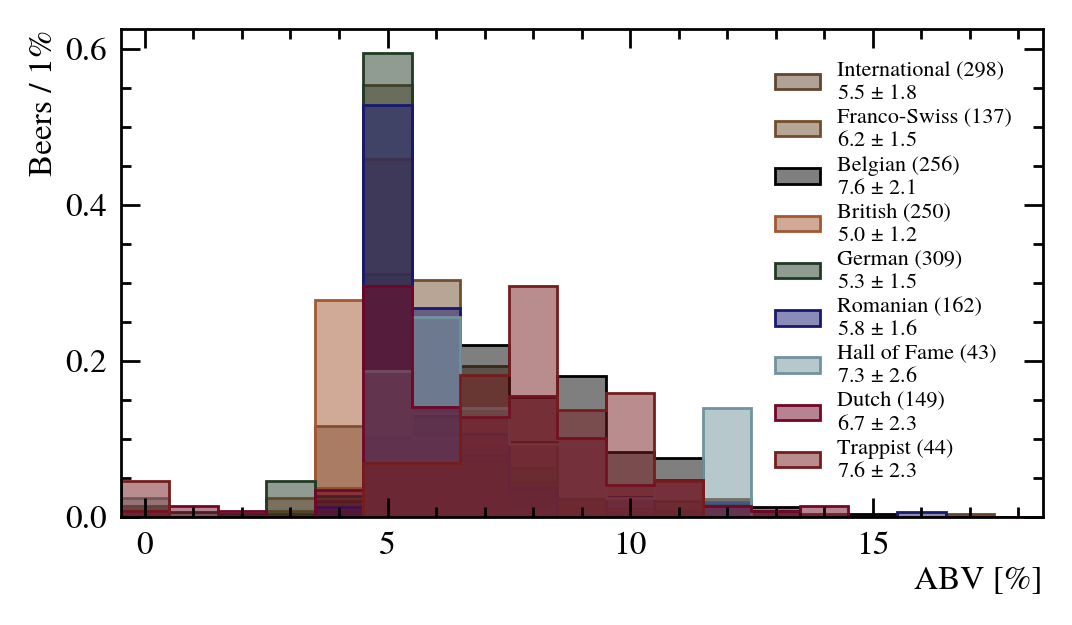

In [75]:
# ABV histogram
fig, ax = plt.subplots(figsize=(16*.66,9*.66))
plt.tight_layout()
plt.margins(x=0)
ps, ls = [], []
for storage in [sChonkyBrown, sChonkyBrown2, sTallBlack, sBigBrown, sGreen, sBlue, sWhite, sRed, sSkinny]:
    dS = df[df.Storage == storage.name]
    hABV = np.histogram(dS.ABV, np.linspace(-.5,18.5,20))
    muABV = np.mean(dS.ABV)
    stdABV = np.std(dS.ABV)
    label = storage.description + f' ({len(dS)})\n' + fr'{muABV:.1f} $\pm$ {stdABV:.1f}'
    plotBorderedHist(hABV, ps, ls, storage.colour, 0.5, label, density=True)
    plt.xlabel('ABV [%]')
    plt.ylabel("Beers / 1%")

applyUniformFont(ax,24)
leg = plotOrderedLegend(list(range(len(ps))), ps, ls, loc='upper right', fontsize=16)
plt.show()
# saveAndListPlot("histABV_storage.pdf", "Histogram of ABVs for each storage")

interactive(children=(IntSlider(value=15, description='elev', max=45, min=-15), IntSlider(value=-45, descripti…

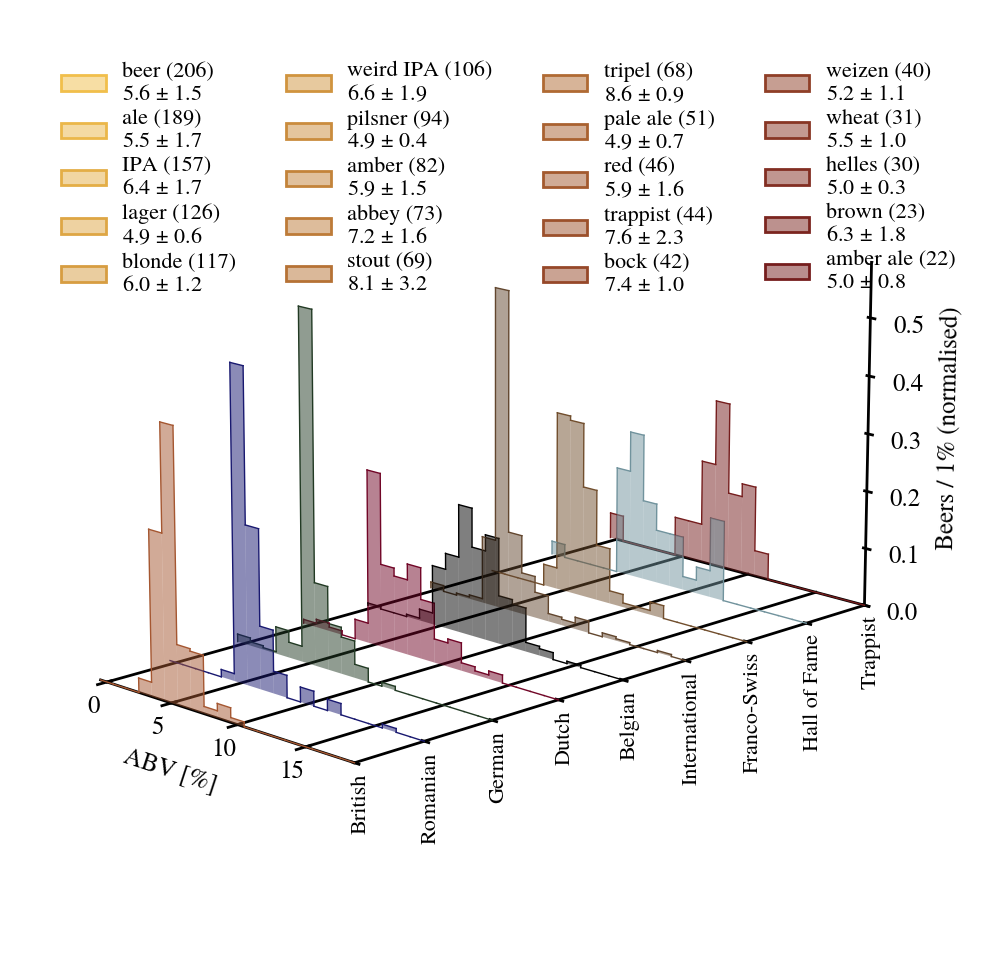

In [79]:
# do it in 3D
# NB: relies on the legend from the previous plot
binning = np.linspace(-.5,18.5,20)
nStorage = len(storages) + 1

fig = plt.figure(figsize=(16,9))
ax = fig.add_axes([0,0,1,1], projection='3d')
ax.margins(x=0, y=0, z=0)
ax.set_box_aspect([3,6,3])
ax.view_init(elev=15, azim=-45)
# ax.view_init(elev=30, azim=-60)
ax.minorticks_off()
ax.zaxis.set_minor_locator(plt.NullLocator())
# ax.autoscale(axis='y', tight=False)

# Set a white background color
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

for division in [0, 5, 10, 15,]: ax.plot([division]*(nStorage-1), range(1, nStorage), c='black', lw=2)
ax.plot([0, binning[-1]], [nStorage-1, nStorage-1], c='black', lw=2)
ax.set_xlabel('ABV [%]', labelpad=10)
# ax.set_ylabel("Storage", labelpad=10)
ax.set_zlabel("Beers / 1% (normalised)", labelpad=15)

ax.grid(False)
plt.tick_params(axis='both', which='both', pad=0)
plt.tick_params(axis='z', which='both', pad=9)
applyUniformFont(ax, 18, in3d=True)

for i, storage in enumerate(storages):
    dS = df[df.Storage == storage.name]
    hABV, _ = np.histogram(dS.ABV, binning)
    norm = sum(hABV)*(binning[1]-binning[0])

    muABV = np.mean(dS.ABV)
    stdABV = np.std(dS.ABV)

    ax.bar(binning[:-1], hABV/norm, width=binning[1]-binning[0], color=storage.colour, align='edge', zs=i+1, zdir='y', alpha=.5)
    # Add outlines at the top of the bars
    for j in range(len(binning)-1): 
        ax.plot([binning[j], binning[j+1]], [hABV[j]/norm, hABV[j]/norm], zs=i+1, zdir='y', color=storage.colour, linewidth=1)
        ax.plot([binning[j], binning[j]], [hABV[j]/norm, hABV[j-1]/norm], zs=i+1, zdir='y', color=storage.colour, linewidth=1)

ax.set_yticks(range(1, nStorage))
ax.set_yticklabels([storage.description for storage in storages], fontsize=16, rotation=90)

plotOrderedLegend(list(range(len(ps))), ps, ls, loc='upper left', fontsize=16, kwargs=dict(ncol=4))

def update(elev=15, azim=-45): 
    ax.view_init(elev, azim)
    fig.canvas.draw_idle()
    fig.canvas.draw()

interact(update);


# plt.show()

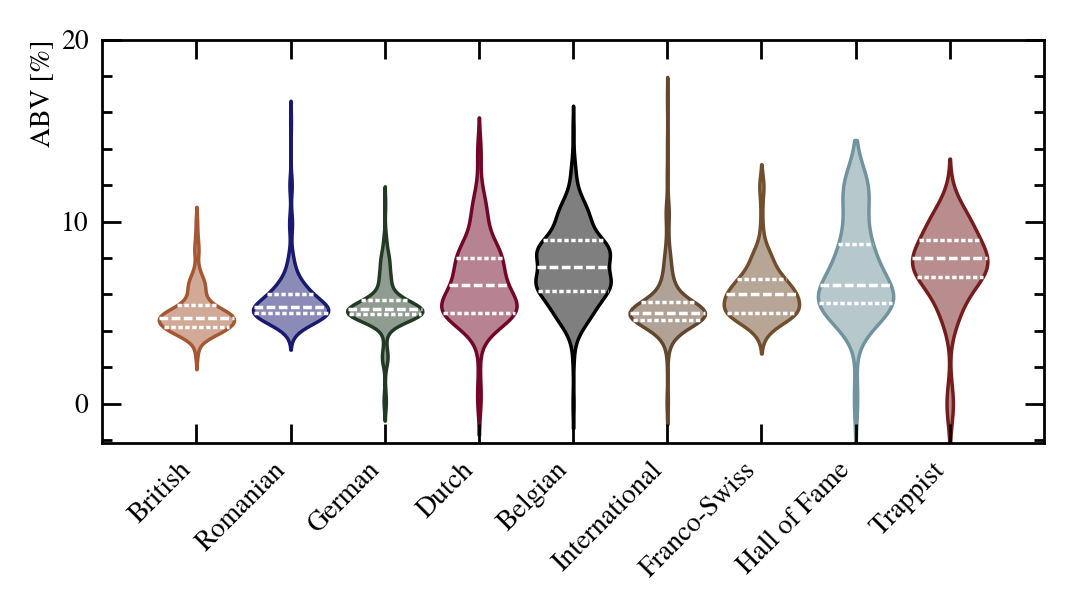

In [77]:
# violin version
fig, ax = plt.subplots(figsize=(16*.66,9*.66))
ax.margins(x=0, y=0)
ax.xaxis.set_minor_locator(plt.NullLocator())

ax.set_ylabel("ABV [%]")#, labelpad=35)

violins = []
for i, storage in enumerate(storages):
    dS = df[df.Storage == storage.name]
    violins.append(sorted(dS.ABV))

ax = sns.violinplot(data=violins, orient='v', label='bla', linecolor='white', inner='quart') # "box": miniature box-and-whisker plot; "quart": quartiles of the data; "point" or "stick": each observation
for i, violin in enumerate(ax.collections): 
    violin.set_edgecolor(storages[i].colour)
    violin.set_facecolor(matplotlib.colors.to_rgba(storages[i].colour, .5))

ax.set_xlim([-1, len(storages)])
ax.set_ylim(top=20)
# ax.set_ylim([0,20])
ax.set_xticks(range(len(storages)), [storage.description for storage in storages], rotation=45, ha='right')
applyUniformFont(ax, 20)

/var/folders/dx/41cd57nj0wd7ssx9b1z74rjc0000gn/T/ipykernel_30087/156351522.py:9: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  btypes = list(set(np.concatenate([x.split(', ') for x in pd.value_counts(d.Type).index])))[1:] # split composite types, ignore empty values
/var/folders/dx/41cd57nj0wd7ssx9b1z74rjc0000gn/T/ipykernel_30087/156351522.py:29: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/var/folders/dx/41cd57nj0wd7ssx9b1z74rjc0000gn/T/ipykernel_30087/156351522.py:30: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/var/folders/dx/41cd57nj0wd7ssx9b1z74rjc0000gn/T/ipykernel_30087/156351522.py:31: MatplotlibDeprecationWarning: The 

/Users/rm1613/Documents/ion-production-at-lhcb/venv-3p12/lib/python3.12/site-packages/ipympl/backend_nbagg.py:336: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.figure.savefig(buf, format='png', dpi='figure')


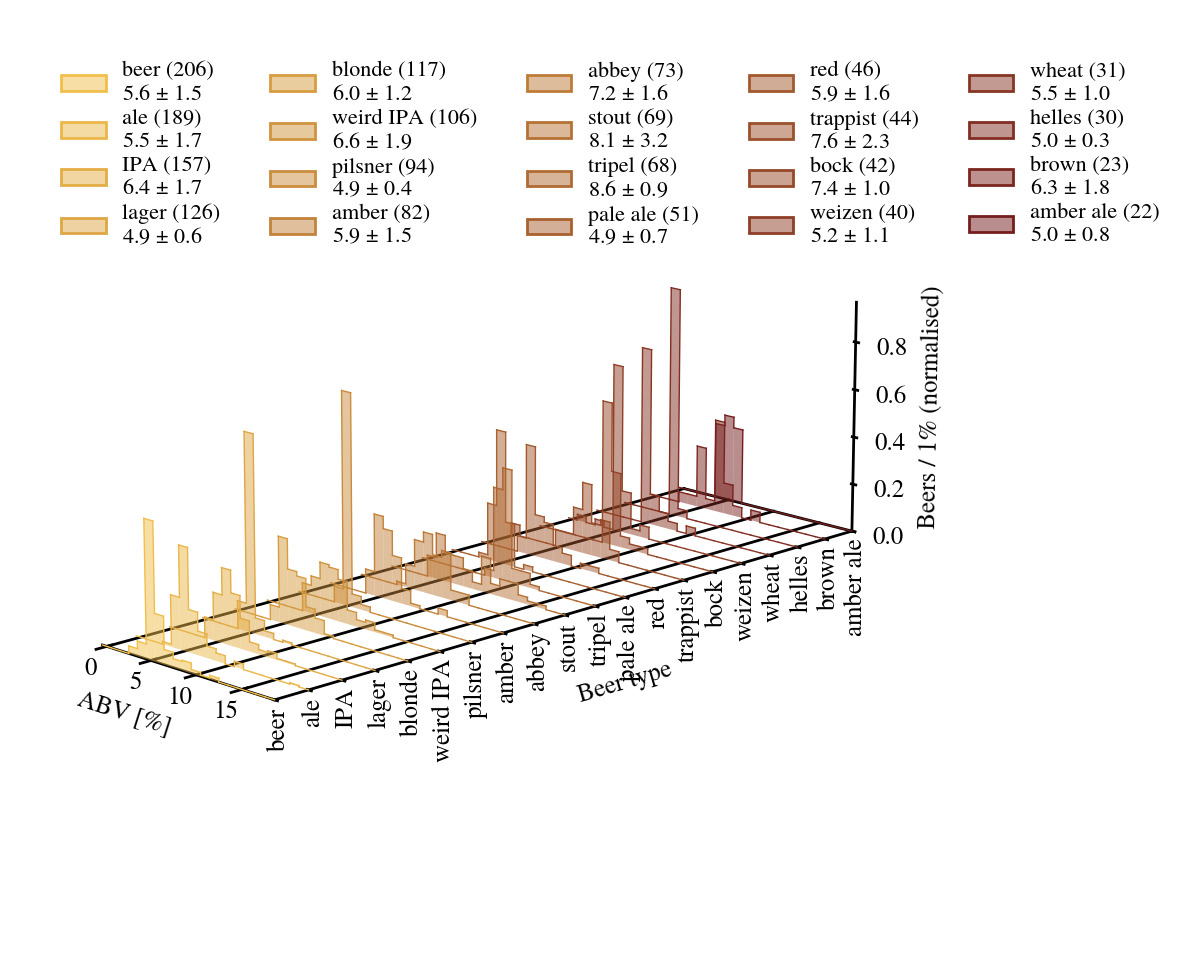

In [78]:
# Group by beer type 
d = df.copy()
d['Type'] = d['Type'].fillna('')
d.loc[(d['Type'].str.contains('IPA'))&(d['Type']!='IPA'), 'Type'] = 'weird IPA'
d.loc[(d['Type']=='pils'), 'Type'] = 'pilsner'
d.loc[(d['Type']=='weissbier'), 'Type'] = 'weizen'
d.loc[(d['Type']=='hell'), 'Type'] = 'helles'

btypes = list(set(np.concatenate([x.split(', ') for x in pd.value_counts(d.Type).index])))[1:] # split composite types, ignore empty values
counts = [(btype, sum([1 for typ in d.Type if btype in typ])) for btype in btypes]

nCounts = 20
countsType = sorted(counts, key=lambda x: x[1], reverse=True)[:nCounts] 
# countsType = pd.value_counts(d.Type)[:nCounts]
colours = sampleCmapColours('beer', nCounts)
ps, ls = [], []

fig = plt.figure(figsize=(16,9))
ax = fig.add_axes([0,0,1,1], projection='3d')
ax.margins(x=0, y=0, z=0)
ax.set_box_aspect([3,10,3])
ax.view_init(elev=15, azim=-45)
# ax.view_init(elev=30, azim=-60)
ax.minorticks_off()
ax.zaxis.set_minor_locator(plt.NullLocator())
# ax.autoscale(axis='y', tight=False)

# Set a white background color
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

for division in [0, 5, 10, 15,]: ax.plot([division]*(nCounts), range(nCounts), c='black', lw=2)
ax.plot([0, binning[-1]], [nCounts-1, nCounts-1], c='black', lw=2)
ax.set_xlabel('ABV [%]', labelpad=10)
ax.set_ylabel("Beer type", labelpad=60)
# ax.set_yticks(list(range(nCounts)), countsType.index, rotation=90)
ax.set_yticks(list(range(nCounts)), [x[0] for x in countsType], rotation=90)
ax.set_zlabel("Beers / 1% (normalised)", labelpad=15)

ax.grid(False)
plt.tick_params(axis='both', which='both', pad=0)
plt.tick_params(axis='z', which='both', pad=9)
applyUniformFont(ax, 18, in3d=True)

# for i, btype in enumerate(countsType.index):
for i, (btype, count) in enumerate(countsType):
    dS = d[d.Type.str.contains(btype)]
    hABV, _ = np.histogram(dS.ABV, binning)
    norm = sum(hABV)*(binning[1]-binning[0])
    # norm=1.

    muABV = np.mean(dS.ABV)
    stdABV = np.std(dS.ABV)

    pFill = mpatches.Patch(fc=colours[i], alpha=.5, label=btype)
    pStep = mpatches.Patch(ec=colours[i], color='none')
    ps.append((pStep, pFill))
    ls.append(f'{btype} ({count}) \n'+fr'{muABV:.1f} $\pm$ {stdABV:.1f}')

    ax.bar(binning[:-1], hABV/norm, width=binning[1]-binning[0], color=colours[i], align='edge', zs=i, zdir='y', alpha=.5)
    # Add outlines at the top of the bars
    for j in range(len(binning)-1): 
        ax.plot([binning[j], binning[j+1]], [hABV[j]/norm, hABV[j]/norm], zs=i, zdir='y', color=colours[i], linewidth=1)
        ax.plot([binning[j], binning[j]], [hABV[j]/norm, hABV[j-1]/norm], zs=i, zdir='y', color=colours[i], linewidth=1)

plotOrderedLegend(list(range(len(ps))), ps, ls, loc='upper left', fontsize=16, kwargs=dict(ncol=5))

# Histogram of ABVs

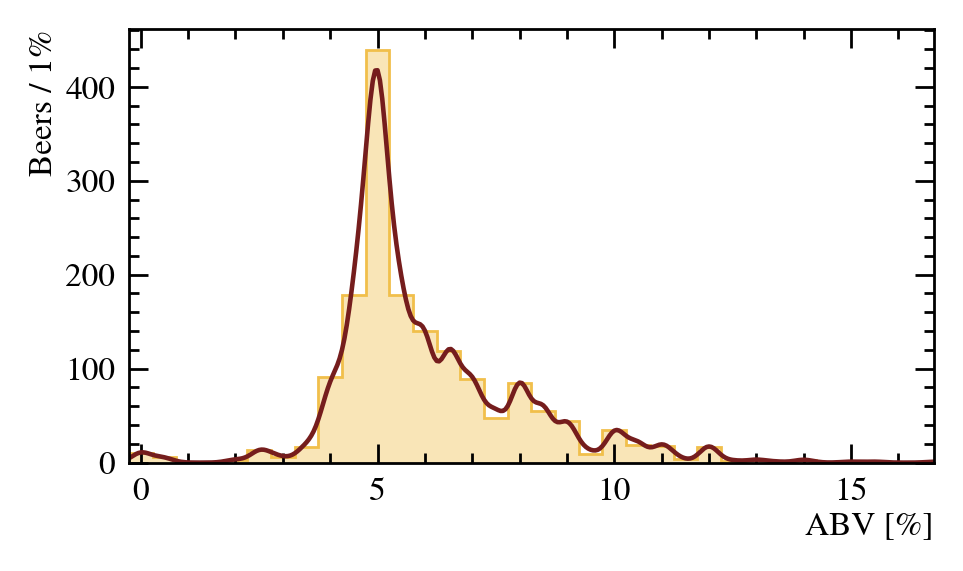

In [80]:
abv = df.ABV.dropna()
binning = np.linspace(-.25,16.75,341)
hABV = np.histogram(abv, binning[::10])
kdeABV = stats.gaussian_kde(abv, bw_method=.1)

fig, ax = plt.subplots(figsize=(16*.6,9*.6))
plt.tight_layout()
plt.margins(x=0)
plotBorderedHist(hABV, [], [], clr.beeryellow, .4)
plt.plot(binning, .5*len(abv)*kdeABV(binning), clr.beerbrown) 
plt.xlabel('ABV [%]')
plt.ylabel("Beers / 1%")
applyUniformFont(ax,24)
plt.show()
# plt.savefig("histABV.pdf", "Histogram of ABVs")
# plt.close()

# Histogram of countries

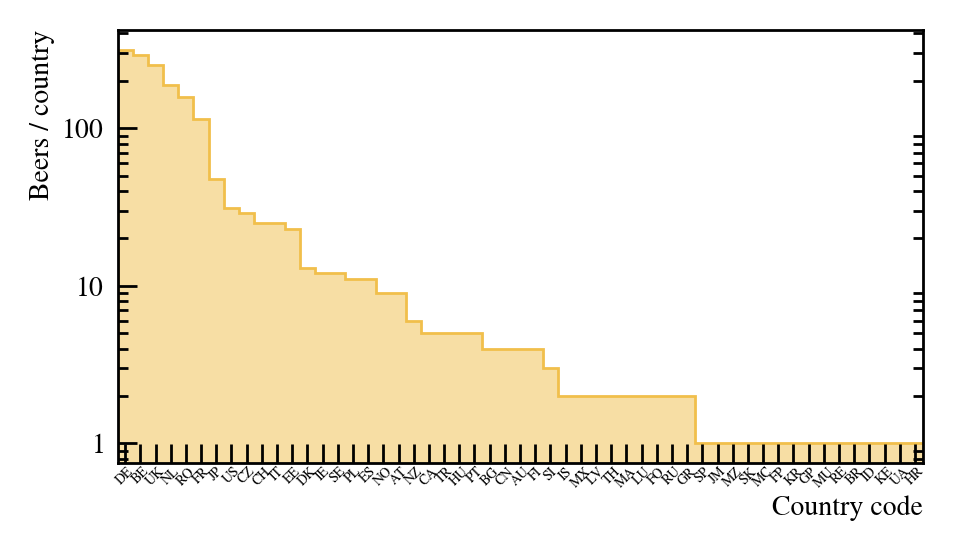

In [19]:
dg = df.Country.value_counts()
bins = np.linspace(0,len(dg),len(dg)+1)
fig, ax = plt.subplots(figsize=(16*.6,9*.6))
plt.tight_layout()
plt.margins(x=0)
histplot(dg, bins, color='#f1bf4b', histtype="fill", alpha=.5)
histplot(dg, bins, color='#f1bf4b', histtype="step")
ax.set_xticks(.5*(bins[1:]+bins[:-1]))
ax.minorticks_off()
plt.xlabel('Country code')
plt.ylabel("Beers / country")
applyUniformFont(ax,20)
ax.set_xticklabels(dg.index, fontsize=10, rotation=45)
plt.tick_params(axis='x', pad=1)
plt.tick_params(axis='both', top=False,right=False)
# ax.set_ylim(top=350)
ax.set_yscale('log')
plt.show()

# ABV per country

/Users/rm1613/Documents/ion-production-at-lhcb/venv-3p12/lib/python3.12/site-packages/iminuit/cost.py:2544: PerformanceWarning: model should return numpy array, but returns <class 'float'>
  warnings.warn(msg, PerformanceWarning)
/Users/rm1613/Documents/ion-production-at-lhcb/venv-3p12/lib/python3.12/site-packages/iminuit/cost.py:2544: PerformanceWarning: model should return numpy array, but returns <class 'float'>
  warnings.warn(msg, PerformanceWarning)


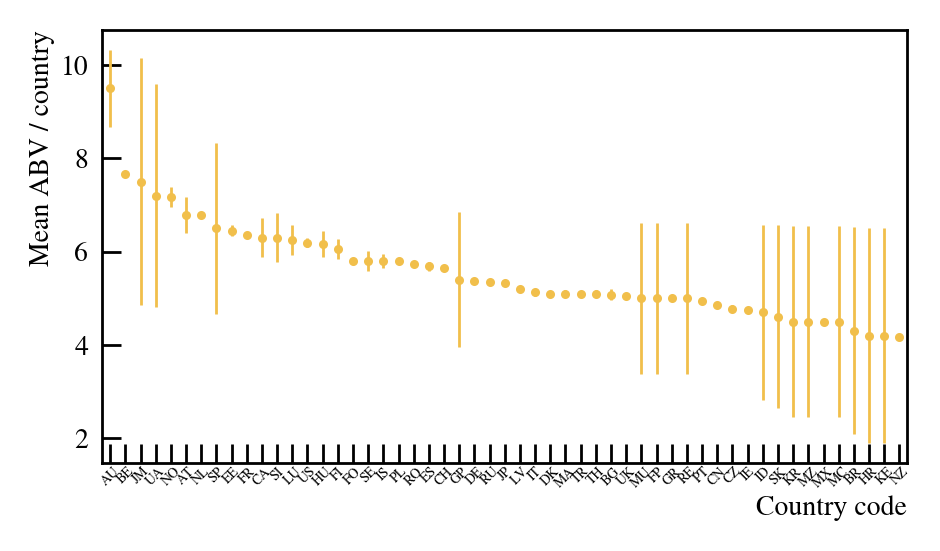

In [20]:
dGrp = df.groupby("Country")
means = dGrp.ABV.mean()
eoms = dGrp.ABV.std() / dGrp.ABV.count()
dh = pd.concat([means,eoms], keys=['MeanABV','ErrorOnABV'], axis=1)
dh = dh.sort_values('MeanABV',ascending=False)

# where there's only one entry, use the KDE to set a 68% credible interval as uncertainty
for _, row in dh.iterrows():
    if np.isnan(row.ErrorOnABV):
        def CISymmetric(_, x): return kdeABV.integrate_box(row.MeanABV-x, row.MeanABV+x) - .6827
        m = Minuit(LeastSquares([0], [0], 1e-5, CISymmetric), x=1)
        result = m.migrad()
        row.ErrorOnABV = result.params['x'].value

fig, ax = plt.subplots(figsize=(16*.6,9*.6))
plt.tight_layout()
plt.margins(x=0.01)
plt.errorbar(.5*(bins[1:]+bins[:-1]), dh.MeanABV, dh.ErrorOnABV, False, ls='', marker='.', markersize=10, elinewidth=2, capsize=0, color='#f1bf4b')
ax.set_xticks(.5*(bins[1:]+bins[:-1]))
ax.minorticks_off()
plt.xlabel('Country code')
plt.ylabel("Mean ABV / country")
applyUniformFont(ax,20)
ax.set_xticklabels(dh.index, fontsize=10, rotation=45)
# ax.set_ylim([3,13])
plt.tick_params(axis='x', pad=1)
plt.tick_params(axis='both', top=False,right=False)
plt.show()

# Time evolution

In [21]:
landmarks = np.array([
    [dt.datetime(2018,3,27,0,0), 'CERN', 15],
    [dt.datetime(2019,9,26,0,0), 'London', 15],
    [dt.datetime(2020,12,8,0,0), 'RO', 15],
    [dt.datetime(2021,6,27,0,0), 'London', 15],
    [dt.datetime(2022,1,27,0,0), 'DENL', 15],
    [dt.datetime(2025,3,18,0,0), 'JP', -70],
    [dt.datetime(2025,4,24,0,0), 'DENL', 15],
    # [dt.datetime(2025,1,1,0,0), 5, 15],
    [dt.datetime(2030,1,1,0,0), '', 15],
])
dates = landmarks[:,0]
locations = landmarks[:,1][:-1]
timestamps = [x.timestamp() for x in dates]

def plotLandmarkDates(y, zorder=-99):
    for i in range(len(locations)):
        plt.axvline(x=dates[i], c='#9C4431', ls='--', zorder=zorder) # F1DD59 # EED892
        plt.text(dates[i]+dt.timedelta(days=landmarks[i,2]), y, locations[i], c='w', va='top', ha='left', zorder=zorder, path_effects=[pe.Stroke(linewidth=.5, foreground='#9C4431')])

In [22]:
# Process the data
df['Date'] = pd.to_datetime(df['Date'], errors='coerce',format='%d/%m/%Y')
day0 = np.mean(df.Date).date()
dDates = df[pd.notna(df['Date'])][['Number','Date','ABV','Storage']]
dDates['usableDate'] = [(x.date() - dt.date(2018,1,1)).days for x in dDates['Date']]
dDates = dDates.query('usableDate > 0')
dDates = dDates[pd.notna(dDates['Number'])]
dDates['x'] = [(x.date() - day0).days for x in dDates['Date']]
# please the mathematicians
# dDates['costheta'] = dDates['x'] * 2 / (dDates.x.max() - dDates.x.min()) 
# dDates['y'] = dDates['Number'] * 2 / (dDates.Number.max() - dDates.Number.min())

# fit a 2nd order Chebychev polynomial
def cheby2(x, c0=0, c1=1, c2=0):
    return c0 + c1 * x + c2 * (2*x*x - 1)
# fit a 4thd order Chebychev polynomial
def cheby4(x, c0=0, c1=1, c2=0, c3=0, c4=0):
    return cheby2(x,c0,c1,c2) + \
    c3 * (4*x*x*x - 3*x) + \
    c4 * (8*x*x*x*x - 8*x*x - 1)
def expo(x, norm, x0, shift): return norm*np.exp((x+min(dDates.x))/x0)+shift

# minimiser = Minuit(LeastSquares(np.array(dDates.x), np.array(dDates.Number), np.ones_like(dDates.Number), cheby4), 
# minimiser = Minuit(LeastSquares(np.array(dDates.x), np.array(dDates.Number), np.ones_like(dDates.Number), cheby2), 
#     c0 = 600, 
#     c1 = .5,
#     c2 = 1e-5,
    # c3 = 1e-5,
    # c4 = 1e-5,
    # )
minimiser = Minuit(LeastSquares(np.array(dDates.x), np.array(dDates.Number), np.ones_like(dDates.Number), expo), 
    norm = 1500, 
    x0 = 2000,
    shift = 300,
    )
result = minimiser.migrad()
param_hesse = result.hesse()
param_errors = result.errors

fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {minimiser.fval:1.1e} / {len(dDates) - minimiser.nfit}",
]
for p, v, e in zip(minimiser.parameters, minimiser.values, minimiser.errors):
    if not minimiser.fixed[p]:
        fit_info.append(f"{p} = ${v:1.1e} \\pm {e:1.1e}$")

In [23]:
result

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.806e+06 (χ²/ndof = 1248.3)│              Nfcn = 187              │
│ EDM = 5.07e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ norm  │ 2.7841e3  │ 0.0008e3  │            │            │         │         │       │
│ 1 │ x0    │ 2.8461e3  │ 0.0014e3  │            │            │         │         │       │
│ 2 │ shift │  -889.8   │    0.9    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │  norm    x0 shift │
├───────┼───────────────────┤
│  norm │ 0.634   1.1  -0.7 │
│    x0 │   1.1  2.08  -1.3 │
│ shift │  -0.7  -1.3 0.778 │
└───────┴───────────────────┘

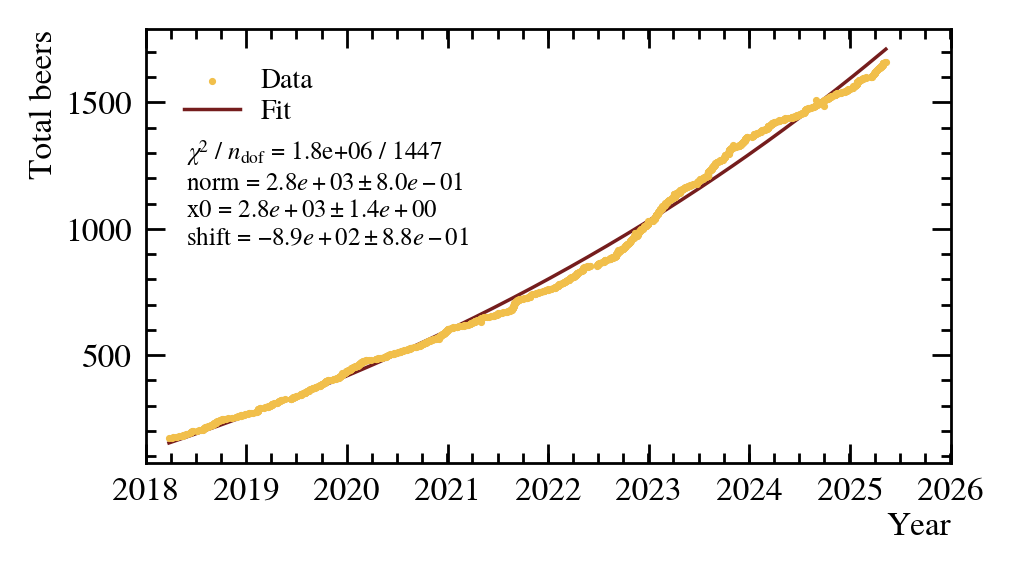

In [24]:
fig, ax = plt.subplots(figsize=(16*.6,9*.6))
plt.tight_layout()
plt.margins(x=0)
plt.xlabel('Year')
plt.ylabel('Total beers')
# plt.plot(np.sort(dDates.Date), cheby4(np.sort(dDates.x), *minimiser.values), color='#751D1D', lw=2.5, zorder=-99, label='Fit')
plt.plot(np.sort(dDates.Date), expo(np.sort(dDates.x), *minimiser.values), color='#751D1D', lw=2.5, zorder=-99, label='Fit')
plt.scatter(dDates.Date, dDates.Number, color='#f1bf4b', s=10, label='Data')
# plt.scatter(dDates.x, dDates.Number, color='#f1bf4b', s=10, label='Data')
plotOrderedLegend([1,0])
ax.set_xlim([dt.date(2018,1,1), dt.date(2026,1,1)])
applyUniformFont(ax,24)
# plotLandmarkDates(1250)
plt.text(.05,.75, "\n".join(fit_info), transform=ax.transAxes, fontsize=18, ha='left', va='top')
plt.show()

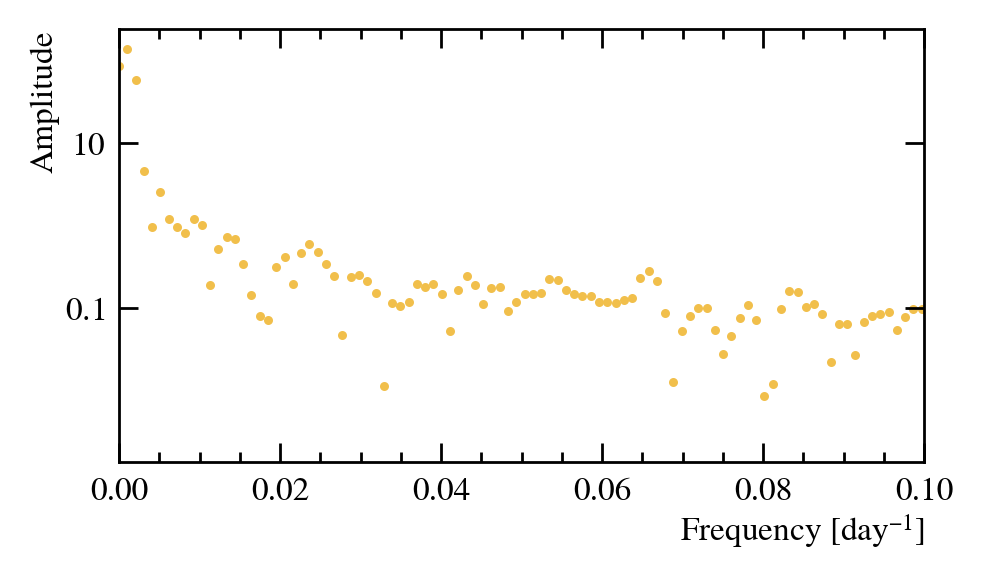

In [25]:
# FFT of the dates
dg = dDates.groupby(dDates.Date)
N = len(dg)
y = dg.Number.max().values
y -= .5 * (dDates.Number.max() - dDates.Number.min())

# N = len(dDates.Number)
# y = np.sort(dDates.Number)-np.mean(dDates.Number)
FFT = fft.fft(y) 
# first half are the positive-frequency terms and the rest are the negative-frequency terms
xf = fft.fftfreq(N, 1)[:N//2]
# use a window to make the peaks stand out
from scipy.signal.windows import blackman
w = blackman(N)
FFT = fft.fft(y*w)

fig, ax = plt.subplots(figsize=(16*.6,9*.6))
plt.tight_layout()
plt.margins(x=0)
ax.set_xlabel('Frequency [day$^{-1}$]')
ax.set_ylabel('Amplitude')

plt.scatter(xf, 2.0/N * np.abs(FFT[0:N//2]),s=20, c='#f1bf4b')
ax.set_xlim(right=.1)
ax.set_yscale('log')
# ax.set_xscale('log')
# ax.set_ylim(bottom=1)
applyUniformFont(ax,24)
plt.show()

# Time evolution of mean ABV

In [43]:
def rollingMeanVariance(l, mu=0, v=0, i0=0):
    mus, vs = [], []
    n = len(l)
    for i in range(n):
        delta = l[i] - mu
        mu += delta / (i+1+i0)
        mus.append(mu)
        v += (l[i] - mu) * delta
        vs.append(v / (i+1+i0))
    return mus, vs

In [57]:
dh = df[pd.notna(df['ABV'])][['Number','Date','ABV']]
# start with the mean before dating
mBefore = [pd.isna(x) or (x.date() - dt.date(2018,1,1)).days < 0 for x in dh['Date']]
listBefore = np.sort(dh[mBefore]['ABV'])
mus, vs = rollingMeanVariance(listBefore)
mu0, v0 = mus[-1], vs[-1]
nBefore = len(dh[mBefore])

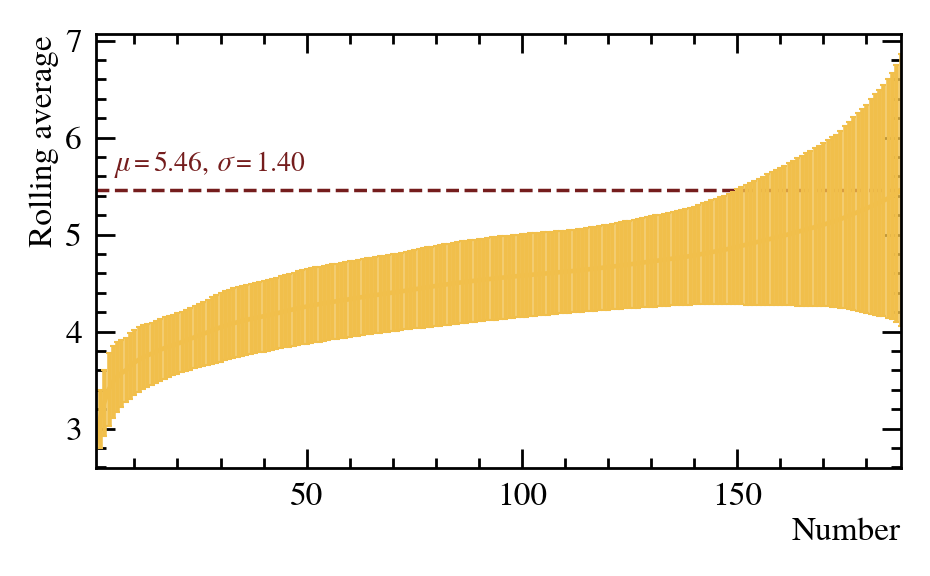

In [58]:
fig, ax = plt.subplots(figsize=(16*.6,9*.6))
plt.tight_layout()
plt.margins(x=0)
plt.xlabel('Number')
plt.ylabel('Rolling average')
# plt.errorbar(range(1,nBefore+1), mu0, vs0, color='#f1bf4b')
plt.axhline(y=mu0, color='#751D1D', lw=2.5, zorder=-99, ls='--')
plt.text(5, mu0+.2, f"$\\mu={mu0:.2f}$, $\\sigma={v0 **.5:.2f}$", color='#751D1D', fontsize=20)
plt.errorbar(range(1,nBefore+1), mus, np.sqrt(vs), color='#f1bf4b') # NB the error bars are not the error on the mean
applyUniformFont(ax,24)
plt.show()

In [59]:
# Continue with the entries that have a usable date
mAfter = [pd.notna(x) and (x.date() - dt.date(2018,1,1)).days > 0 for x in dh['Date']]
dAfter = dh[mAfter].sort_values('Date').reset_index()
listAfter = dAfter.ABV
nAfter = len(listAfter)
mus, vs = rollingMeanVariance(listAfter, mu0, v0*nBefore, nBefore)
mus.insert(0,mu0)
vs.insert(0,v0)
len(mus), nAfter
errs = []
for i in range(len(mus)):
    errs.append((vs[i]/(i+nBefore))**.5)

In [60]:
dAfter

index  Number       Date  ABV
0       923     NaN 2018-03-10  4.5
1      1237   172.0 2018-03-27  4.5
2      1272   173.0 2018-04-08  7.2
3      1409   175.0 2018-04-10  9.0
4      1510   177.0 2018-04-20  8.0
...     ...     ...        ...  ...
1452    721  1656.0 2025-05-02  2.5
1453    776  1657.0 2025-05-02  6.5
1454    722  1658.0 2025-05-04  4.4
1455    716  1659.0 2025-05-08  4.9
1456   1403  1660.0 2025-05-11  0.3

[1457 rows x 4 columns]

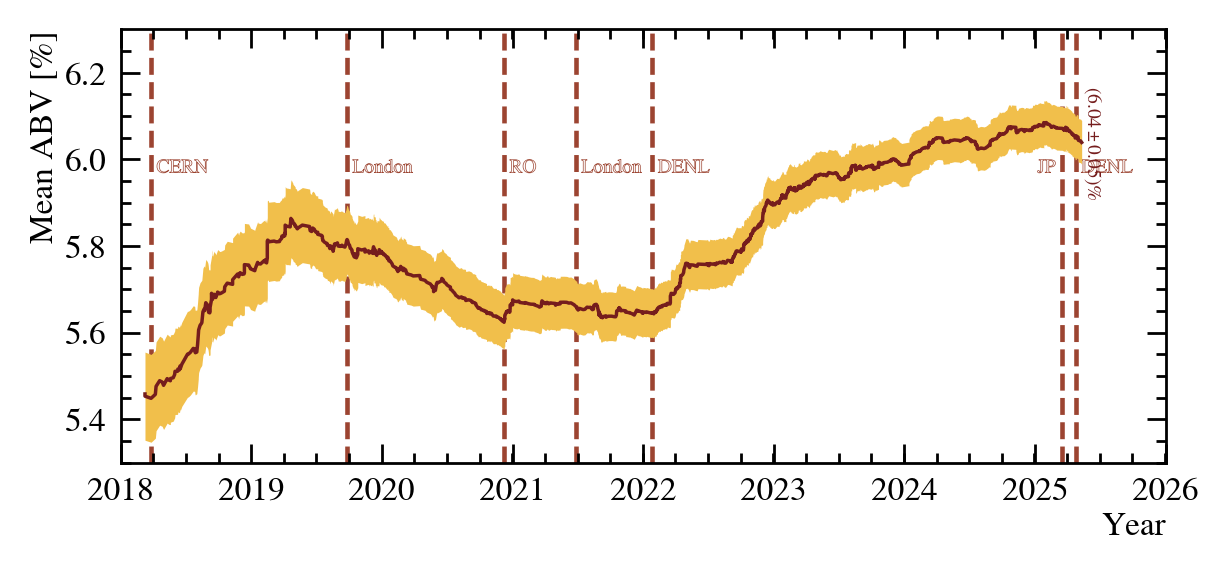

In [47]:
fig, ax = plt.subplots(figsize=(20*.6,9*.6))
plt.tight_layout()
plt.margins(x=0)
plt.xlabel('Year')
plt.ylabel('Mean ABV [%]')
# plt.errorbar([dAfter.Date[0]] + list(dAfter.Date), mus, errs, color='#f1bf4b', ls='',marker='.', markersize=.5, elinewidth=1, capthick=1, capsize=.5, lw=.5) 
ax.fill_between([dAfter.Date[0]] + list(dAfter.Date), np.array(mus)+errs, np.array(mus)-errs, color='#f1bf4b', lw=0)
p1 = ax.plot([dAfter.Date[0]] + list(dAfter.Date), mus, color='#751d1d', lw=2.5, label='bla')
plt.text(np.max(dAfter.Date), mus[-1], f"$({mus[-1]:.2f}\\pm{errs[-1]:.2f})\\%$", color='#751d1d', va='center', rotation=-90, fontsize=14)
ax.set_xlim([dt.date(2018,1,1), dt.date(2026,1,1)])
ax.set_ylim([5.3,6.3])
plotLandmarkDates(6)
applyUniformFont(ax,24)
plt.show()

In [48]:
mus_ABV = np.array(mus)
errs_ABV = np.array(errs)

# Do the same for mean volume

In [49]:
dh = df[pd.notna(df['Vol'])][['Number','Date','Vol']]
# start with the mean before dating
mBefore = [pd.isna(x) or (x.date() - dt.date(2018,1,1)).days < 0 for x in dh['Date']]
listBefore = np.sort(dh[mBefore]['Vol'])
mus, vs = rollingMeanVariance(listBefore)
mu0, v0 = mus[-1], vs[-1]
nBefore = len(dh[mBefore])

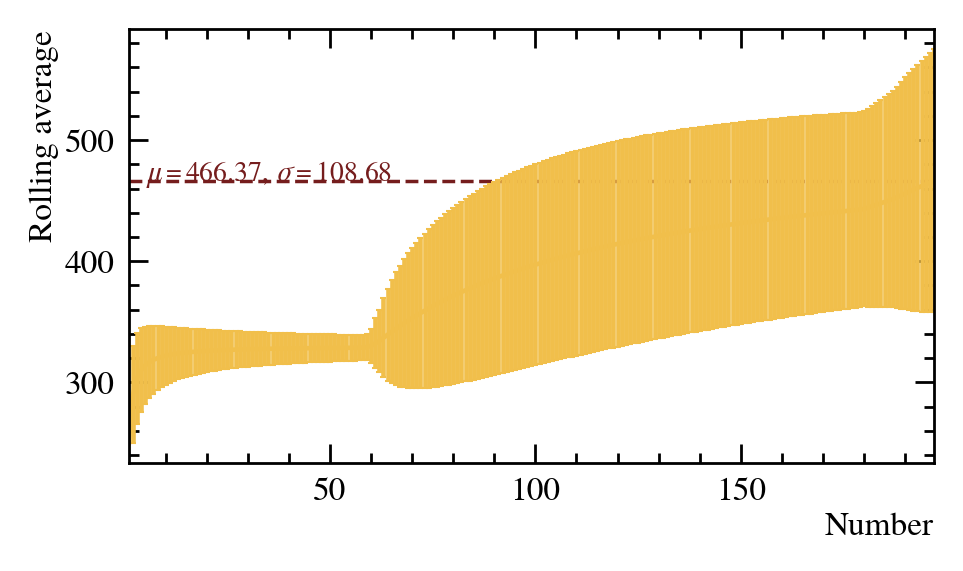

In [50]:
fig, ax = plt.subplots(figsize=(16*.6,9*.6))
plt.tight_layout()
plt.margins(x=0)
plt.xlabel('Number')
plt.ylabel('Rolling average')
# plt.errorbar(range(1,nBefore+1), mu0, vs0, color='#f1bf4b')
plt.axhline(y=mu0, color='#751D1D', lw=2.5, zorder=-99, ls='--')
plt.text(5, mu0+.2, f"$\\mu={mu0:.2f}$, $\\sigma={v0 **.5:.2f}$", color='#751D1D', fontsize=20)
plt.errorbar(range(1,nBefore+1), mus, np.sqrt(vs), color='#f1bf4b') # NB the error bars are not the error on the mean
applyUniformFont(ax,24)
plt.show()

In [51]:
# Continue with the entries that have a usable date
mAfter = [pd.notna(x) and (x.date() - dt.date(2018,1,1)).days > 0 for x in dh['Date']]
dAfter = dh[mAfter].sort_values('Date').reset_index()
listAfter = dAfter['Vol']
nAfter = len(listAfter)
mus, vs = rollingMeanVariance(listAfter, mu0, v0*nBefore, nBefore)
mus.insert(0,mu0)
vs.insert(0,v0)
len(mus), nAfter
errs = []
for i in range(len(mus)):
    errs.append((vs[i]/(i+nBefore))**.5)

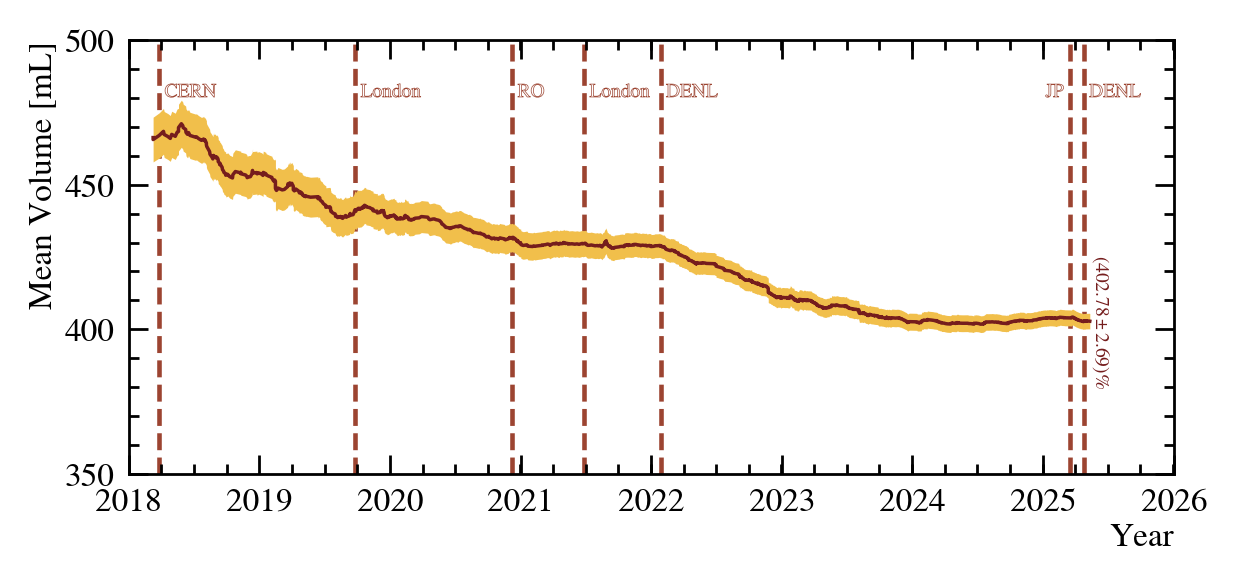

In [52]:
fig, ax = plt.subplots(figsize=(20*.6,9*.6))
plt.tight_layout()
plt.margins(x=0)
plt.xlabel('Year')
plt.ylabel('Mean Volume [mL]')
# plt.errorbar([dAfter.Date[0]] + list(dAfter.Date), mus, errs, color='#f1bf4b', ls='',marker='.', markersize=.5, elinewidth=1, capthick=1, capsize=.5, lw=.5) 
ax.fill_between([dAfter.Date[0]] + list(dAfter.Date), np.array(mus)+errs, np.array(mus)-errs, color='#f1bf4b', lw=0)
p1 = ax.plot([dAfter.Date[0]] + list(dAfter.Date), mus, color='#751d1d', lw=2.5, label='bla')
plt.text(np.max(dAfter.Date), mus[-1], f"$({mus[-1]:.2f}\\pm{errs[-1]:.2f})\\%$", color='#751d1d', va='center', rotation=-90, fontsize=14)
ax.set_xlim([dt.date(2018,1,1), dt.date(2026,1,1)])
ax.set_ylim([350, 500])
plotLandmarkDates(485)
applyUniformFont(ax,24)
plt.show()

In [53]:
mus_Vol = np.array(mus)
errs_Vol = np.array(errs)

# Now both of them together

In [61]:
# TODO: update ABV info

# Separation by (rough) location when drunk

In [83]:
mBefore = [pd.isna(x) or (x.date() - dt.date(2018,1,1)).days < 0 for x in df['Date']]
mAfter = [pd.notna(x) and (x.date() - dt.date(2018,1,1)).days > 0 for x in df['Date']]
d = df[mAfter]
d['Timestamp'] = [x.timestamp() for x in d['Date']]

d['Location'] = pd.cut(d['Timestamp'], bins=timestamps, labels=locations, ordered=False)

/var/folders/dx/41cd57nj0wd7ssx9b1z74rjc0000gn/T/ipykernel_25450/898276204.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Timestamp'] = [x.timestamp() for x in d['Date']]
/var/folders/dx/41cd57nj0wd7ssx9b1z74rjc0000gn/T/ipykernel_25450/898276204.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Location'] = pd.cut(d['Timestamp'], bins=timestamps, labels=locations, ordered=False)


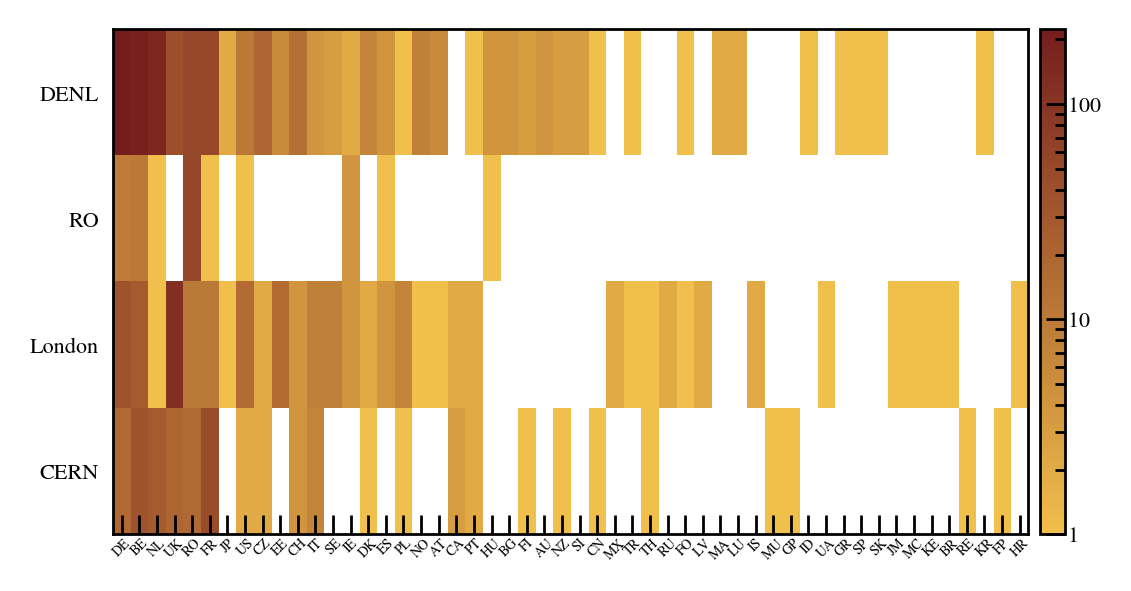

In [84]:
counts = d['Country'].value_counts()
d = d[d['Country'].isin(counts.index)].sort_values(by='Country', key=lambda x: x.map(counts), ascending=False)

xtab = pd.crosstab(d.Location, d.Country)
xtab = xtab[xtab.sum().sort_values(ascending=False).index].reindex(['CERN','London','RO','DENL'][::-1])
fig, ax = plt.subplots(figsize=(18*.6,9*.6), layout='constrained')
plt.margins(x=0)
im = ax.imshow(xtab, aspect='auto', rasterized=True, norm=LogNorm(), 
              cmap=LinearSegmentedColormap.from_list("beer",colors=['#f1bf4b','#751d1d']))
locs = xtab.index.tolist()
countries = xtab.columns.tolist()

# Set axis labels and tick positions
plt.yticks(range(len(locs)), locs)
applyUniformFont(ax,16)
plt.xticks(range(len(countries)), countries, rotation=45, fontsize=10)
plt.minorticks_off()
plt.tick_params(axis='x', pad=1),
plt.tick_params(axis='both', top=False,right=False, left=False)

cbar = fig.colorbar(im, shrink=1., pad=.01)
cbar.ax.tick_params(axis='both', pad=1)
applyUniformFont(cbar.ax,16)
plt.show()

In [171]:
xtab

Country    DE   BE   UK   NL  RO  FR  US  CZ  CH  EE  ...  SP  SK  JM  BR  MC  \
Location                                              ...                       
DENL      217  192   39  149  52  52  10  19  14   6  ...   1   1   0   0   0   
RO          9   10    0    1  54   1   1   0   0   0  ...   0   0   0   0   0   
London     37   28  122    1  10  10  16   2   4  16  ...   0   0   1   1   1   
CERN       17   36   19   28  17  45   2   2   4   0  ...   0   0   0   0   0   

Country   KE  RE  KR  HR  GR  
Location                      
DENL       0   0   1   0   1  
RO         0   0   0   0   0  
London     1   0   0   1   0  
CERN       0   1   0   0   0  

[4 rows x 52 columns]

# Time between 100s

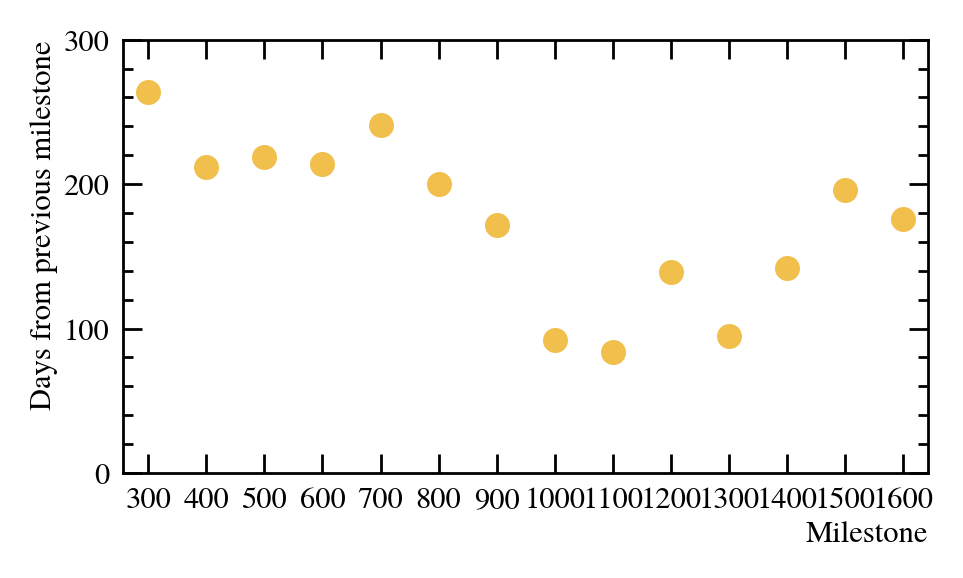

In [85]:
d100 = df[df.Number%100==0].sort_values(by='Number').reset_index(drop=True)
fig, ax = plt.subplots(figsize=(16*.6,9*.6))
plt.tight_layout()
plt.margins(x=50/(max(d100.Number)-min(d100.Number)+100))
plt.xlabel('Milestone')
plt.ylabel('Days from previous milestone')
plt.scatter(np.arange(min(d100.Number)+100, max(d100.Number)+1, 100), [x.days for x in d100['Date'].diff()][1:], color=niceColour('beeryellow'))
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(NullLocator())
ax.set_ylim([0,300])
applyUniformFont(ax, 22)
plt.show()

# How many beers were drunk in a given day

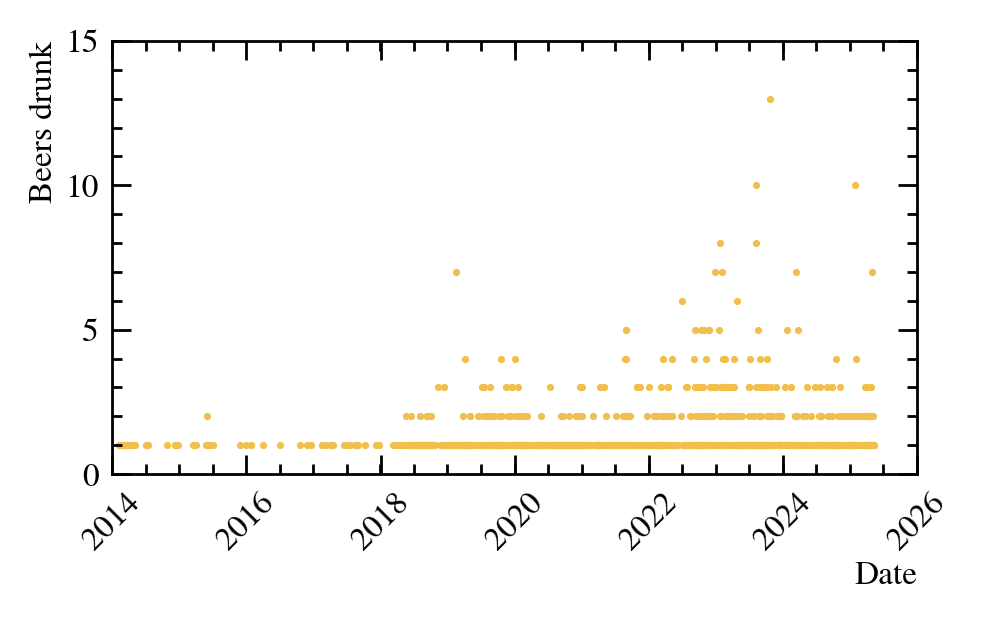

In [87]:
dGrp = df.groupby('Date')
bdrunk = dGrp.size()
# bdrunk.index
fig, ax = plt.subplots(figsize=(16*.6,9*.6))
plt.tight_layout()
plt.margins(x=0)
ax.set_xlabel("Date")
ax.set_ylabel("Beers drunk")
ax.set_ylim([0,15])
ax.set_xlim([dt.date(2014,1,1), dt.date(2026,1,1)])
plt.xticks(rotation=45)
# ax.xaxis.set_major_locator(MaxNLocator(nbins=10))
# ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
plt.scatter(bdrunk.index, bdrunk, s=10, c=niceColour("beeryellow"))
applyUniformFont(ax,24)
plt.show()

In [88]:
hdrunk = bdrunk.value_counts()
errs = np.sqrt(hdrunk.values)
binningFine = np.linspace(.5, max(hdrunk.index)+.5, 100*max(hdrunk.index)+1)

# fit an exponential or a power-law
def expo(x, N=1, l=0): return N*np.exp(-l*(x-1))
def pwr(x, N=1, n=0): return N*x**(-n)

mExpo = Minuit(LeastSquares(hdrunk.index, hdrunk.values, errs, 
                                expo), N=hdrunk.values[0], l=1)
resultExpo = mExpo.migrad()
param_hesse = result.hesse()
param_errors = result.errors

mPwr = Minuit(LeastSquares(hdrunk.index, hdrunk.values, errs, 
                                pwr), N=hdrunk.values[0], n=1)
resultPwr = mPwr.migrad()
param_hesse = result.hesse()
param_errors = result.errors

In [89]:
resultExpo

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 23.74 (χ²/ndof = 3.0)      │              Nfcn = 46               │
│ EDM = 9.15e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N    │    731    │    27     │            │            │         │         │       │
│ 1 │ l    │   1.29    │   0.05    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       N       l │
├───┼─────────────────┤
│ N │     743  0.7686 │
│ l │  0.7686 0.00276 │
└───┴─────────────────┘

In [90]:
resultPwr

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 34.18 (χ²/ndof = 4.3)      │              Nfcn = 89               │
│ EDM = 0.000126 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N    │    781    │    27     │            │            │         │         │       │
│ 1 │ n    │   2.64    │   0.06    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       N       n │
├───┼─────────────────┤
│ N │     715   0.617 │
│ n │   0.617 0.00366 │
└───┴─────────────────┘

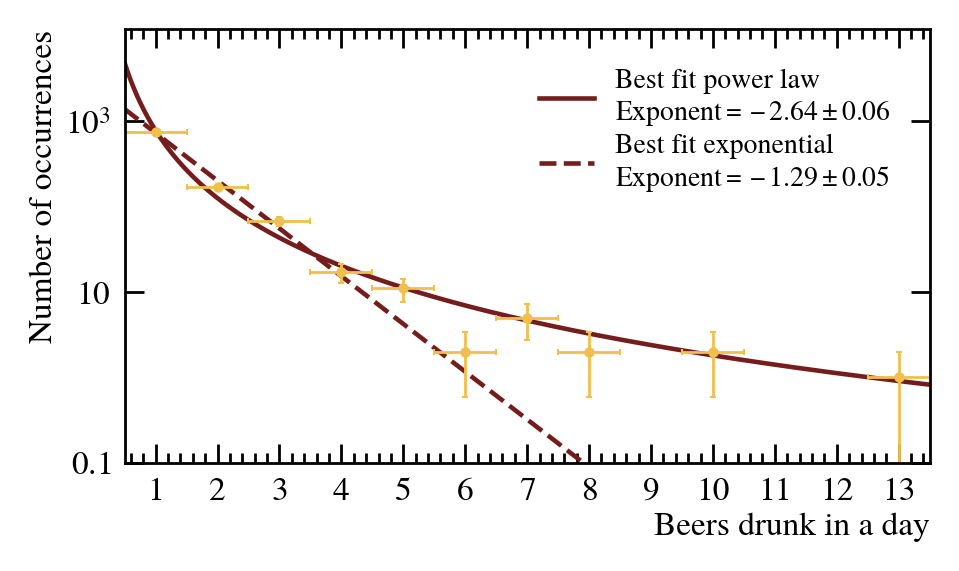

In [94]:
fig, ax = plt.subplots(figsize=(16*.6,9*.6))
plt.tight_layout()
plt.margins(x=0)
ax.set_xlabel("Beers drunk in a day")
ax.set_ylabel("Number of occurrences")
plt.plot(binningFine, expo(binningFine, *mExpo.values), c=clr.beerbrown, ls='--',
         label="Best fit exponential\n"f"Exponent$=-{mExpo.values['l']:.2f}\\pm{mExpo.errors['l']:.2f}$")
plt.plot(binningFine, pwr(binningFine, *mPwr.values), c=clr.beerbrown, 
         label="Best fit power law\n"f"Exponent$=-{mPwr.values['n']:.2f}\\pm{mPwr.errors['n']:.2f}$")
plt.errorbar(hdrunk.index, hdrunk.values, errs, 0.5, c=clr.beeryellow, ls='', marker='.', markersize=12., capsize=2.5, elinewidth=2, label='Data')
ax.set_xticks(np.linspace(1, max(hdrunk.index), max(hdrunk.index)))

plotOrderedLegend([1,0], loc=1)

ax.set_yscale('log')
ax.set_ylim(bottom=.1)
applyUniformFont(ax,24)
plt.show()

# Convex hulls

In [92]:
from scipy.spatial import ConvexHull, Voronoi, voronoi_plot_2d

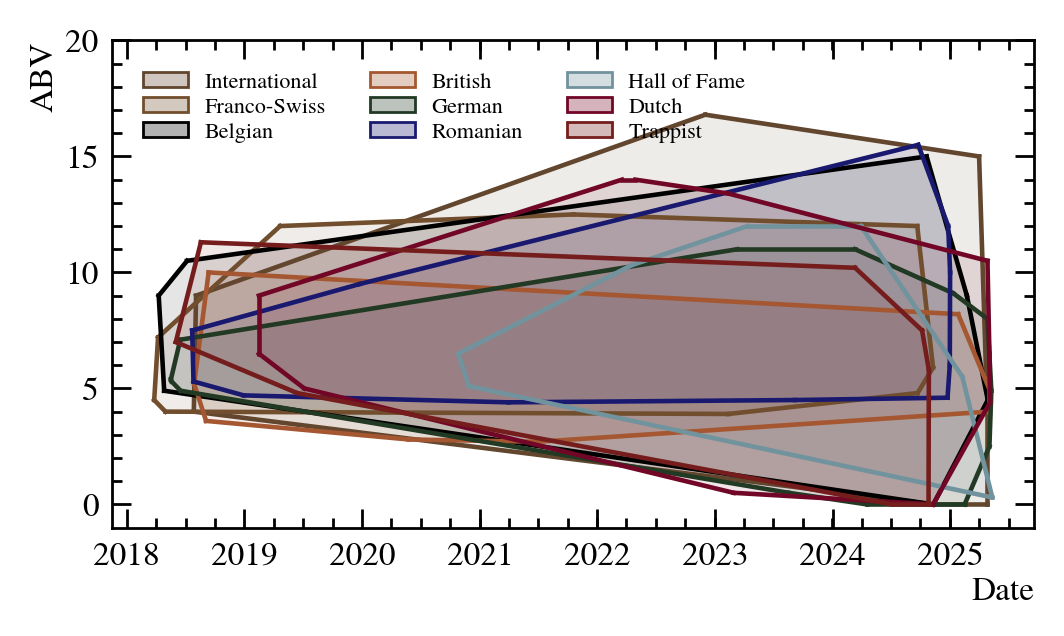

In [93]:
# storages in (ABV, date) space
dDates.dropna(subset=['ABV','Date'], inplace=True)
fig, ax = plt.subplots(figsize=(16*.66,9*.66))
plt.tight_layout()
# plt.margins(x=0)
ax.set_xlabel("Date")
ax.set_ylabel("ABV")
ax.set_ylim([-1,20])

# plt.scatter(points[:,0], points[:,1], s=10, c=niceColour("beeryellow"), zorder=99)

years = range(dt.date(2018,1,1).year, dDates['Date'].dt.year.max() + 1)
plt.xticks(
    ticks=[(dt.date(year, 1, 1) - dt.date(2018,1,1)).days for year in years],
    labels=[str(year) for year in years],  # Display only the year
)

handles=[]
for storage in [sChonkyBrown, sChonkyBrown2, sTallBlack, sBigBrown, sGreen, sBlue, sWhite, sRed, sSkinny]:
    dS = dDates[dDates.Storage == storage.name]
    points = np.array(dS[['usableDate', 'ABV']])
    hull = ConvexHull(points)
    ax.add_patch(plt.Polygon(points[hull.vertices], fc=storage.colour, alpha=.1, lw=0, label=storage.description))
    for simplex in hull.simplices: plt.plot(points[simplex, 0], points[simplex, 1], storage.colour)#, label=storage.description)
    pFill = mpatches.Patch(fc=storage.colour, alpha=.3, label=storage.description)
    pStep = mpatches.Patch(ec=storage.colour, color='none')
    handles.append((pStep, pFill))
    # labels.append(label)
    


plotOrderedLegend(list(range(len(handles))), handles, None, loc='upper left', fontsize=16, kwargs=dict(ncol=3))

applyUniformFont(ax,24)
plt.show()

In [96]:
# # voronoi of ABV,vol coloured by storage/country
# doesn't look nice
# subset = ['ABV','Country','Storage','Vol']
# dtmp = df.dropna(subset=subset)[subset]

# fig, ax = plt.subplots(figsize=(16*.66,9*.66))
# plt.tight_layout()
# # plt.margins(x=0)
# ax.set_xlabel("Volume")
# ax.set_ylabel("ABV")
# ax.set_ylim([-1,20])

# handles=[]
# # for storage in [sChonkyBrown, sChonkyBrown2, sTallBlack, sBigBrown, sGreen, sBlue, sWhite, sRed, sSkinny][:1]:
#     # dS = dtmp[dtmp.Storage == storage.name]
# points = np.array(dtmp[['Vol', 'ABV']])
# vor = Voronoi(points)
# voronoi_plot_2d(vor)
#     # ax.add_patch(plt.Polygon(vor.vertices, fc=storage.colour, alpha=.3, lw=0, label=storage.description))
#     # pFill = mpatches.Patch(fc=storage.colour, alpha=.3, label=storage.description)
#     # pStep = mpatches.Patch(ec=storage.colour, color='none')
#     # handles.append((pStep, pFill))
#     # labels.append(label)
    
# plt.scatter(dtmp.Vol, dtmp.ABV, s=10, c=niceColour("beeryellow"), zorder=99)

# # plotOrderedLegend(list(range(len(handles))), handles, None, loc='upper left', fontsize=16, kwargs=dict(ncol=3))

# # applyUniformFont(ax,24)
# # plt.show()

In [95]:
# vor.vertices
# hull.vertices